# SALES PREDICTION USING PYTHON

## Importing Modules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()


'/kaggle/working'

In [5]:
df = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")

### Exploratory Data Analysis

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)


In [9]:
df

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [13]:
df.isnull().values.any()
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


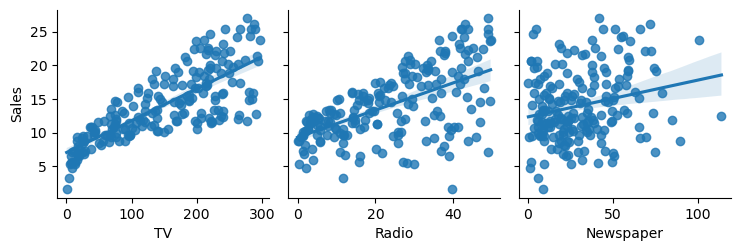

In [14]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")


array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

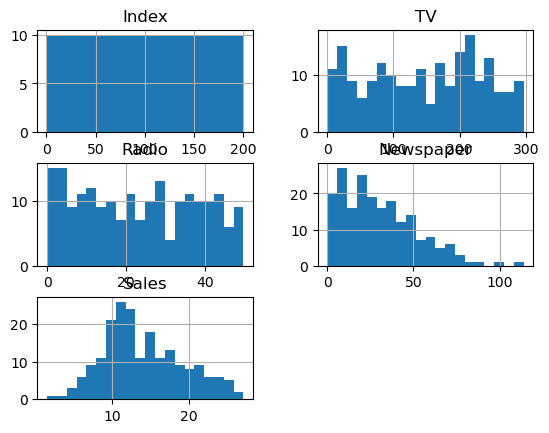

In [15]:
df.hist(bins=20)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


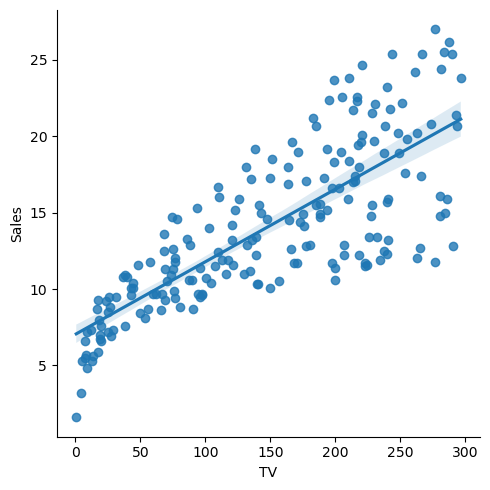

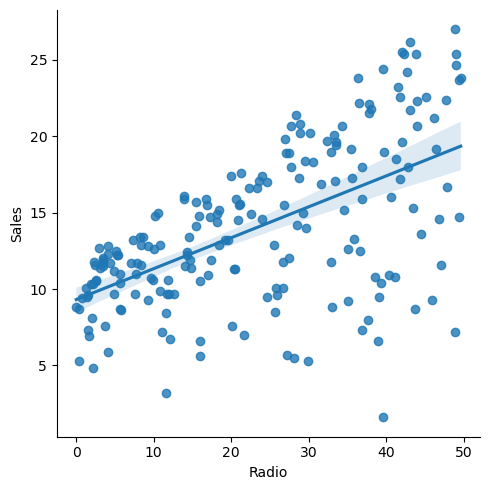

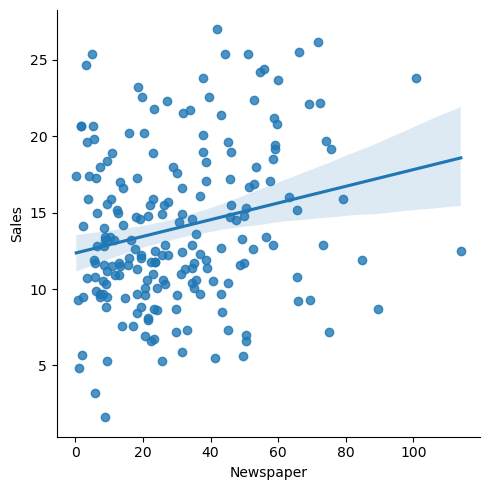

In [16]:
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

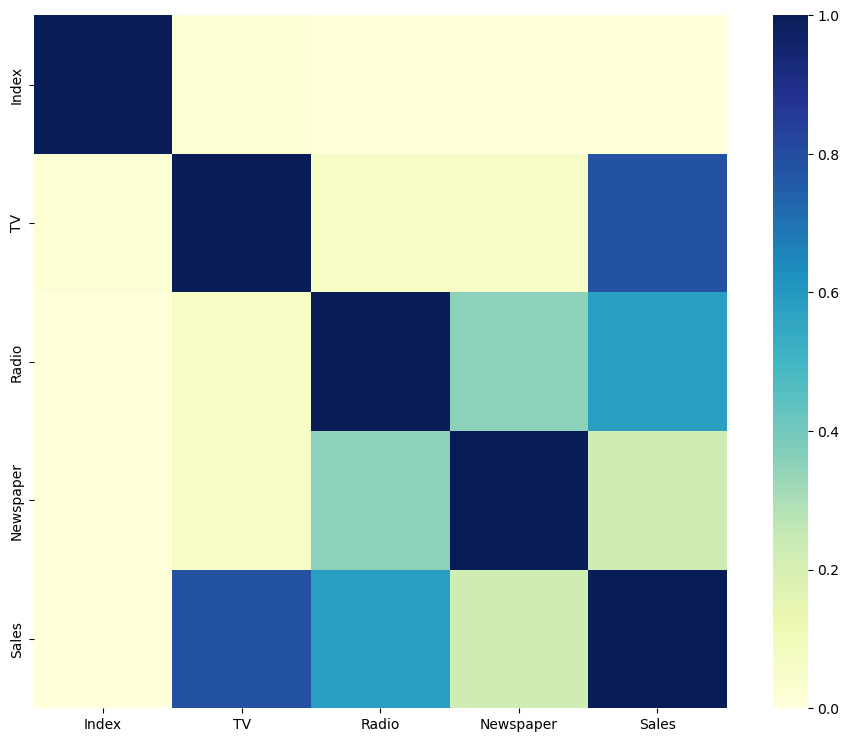

In [17]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

We have gained valuable insights into the advertising dataset. The pair plots and correlation matrix have provided a visual understanding of the relationships between variables. Key observations include:

Positive Correlation: TV and Radio show a positive correlation with Sales, indicating a potential positive impact on sales as spending on TV and Radio advertising increases.

Limited Impact of Newspaper: The correlation between Newspaper advertising and Sales is relatively weak, suggesting that this channel might not be as influential in driving sales.

Distribution of Variables: The histograms reveal the distribution of each variable, highlighting any skewness or outliers that may need further investigation.

The initial exploration sets the stage for our predictive modeling, guiding us on which features may be more influential in predicting sales.

### Model Training

In [18]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


In [19]:
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()


In [20]:
print(lin_model.params, "\n")

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



In [21]:
print(lin_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        18:36:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [22]:
results = []
names = []

In [23]:
models = [('LinearRegression', LinearRegression())]

In [24]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.703648


In [25]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    16.915917
dtype: float64


In [26]:
new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    15.877397
dtype: float64


### Conclusion:
In summary, this analysis aimed to understand the relationships between advertising channels (TV, Radio, Newspaper) and product sales. Key findings from the linear regression model include:

The model, incorporating TV and Radio advertising, demonstrates a high R-squared value of 0.897, indicating a strong explanatory power.
TV and Radio have positive coefficients, suggesting that an increase in spending on these channels is associated with an increase in sales.
However, the coefficient for Newspaper advertising is near zero, indicating it has minimal impact on sales.